<a href="https://colab.research.google.com/github/NguyenMai2001/handleData/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ML_lab/tray_test

/content/drive/MyDrive/ML_lab/tray_test


In [ ]:
ls

VGG16.ipynb  weights_jig.h5  X_jig.pickel  X.pkl           y_jig.pickel  y.pkl
weights.h5   X_jig_1.pickel  X_new.pkl     y_jig_1.pickel  y_new.pkl


In [ ]:
data = './'
X = data + 'X_jig_1.pickel'
y = data + 'y_jig_1.pickel'

with open(X, mode='rb') as f:
  train = pickle.load(f)

with open(y, mode='rb') as f:
  label = pickle.load(f)


In [ ]:
train.shape

(2445, 144, 118, 3)

In [ ]:
label.shape

(2445,)

In [ ]:
train, label = shuffle(train, label)

In [ ]:
# trainX = train[:5000]
# trainy = label[:5000]

# validX = train[5000:7000]
# validy = label[5000:7000]

# testX = train[7000:]
# testy = label[7000:]

#check on jig
trainX = train[:1500]
trainy = label[:1500]

validX = train[1500:2200]
validy = label[1500:2200]

testX = train[2200:]
testy = label[2200:]

In [ ]:
trainX[0].shape

(144, 118, 3)

0


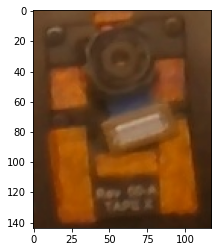

In [ ]:
plt.imshow(trainX[0])
print(trainy[0])

1


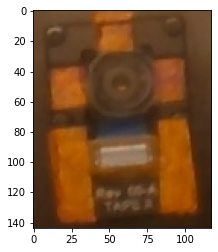

In [ ]:
plt.imshow(trainX[111])
print(trainy[111])

In [ ]:
classNames = {0: 'Wrong',
 1: 'Correct'}

In [ ]:
trainX[0]

array([[[109,  77,  48],
        [107,  75,  46],
        [106,  74,  45],
        ...,
        [112,  82,  55],
        [112,  82,  55],
        [112,  82,  55]],

       [[108,  76,  47],
        [106,  74,  45],
        [104,  72,  43],
        ...,
        [112,  82,  55],
        [112,  82,  55],
        [112,  82,  55]],

       [[106,  73,  47],
        [105,  72,  46],
        [105,  72,  46],
        ...,
        [112,  82,  55],
        [112,  82,  55],
        [113,  83,  56]],

       ...,

       [[ 61,  38,  23],
        [ 60,  37,  21],
        [ 60,  37,  21],
        ...,
        [ 44,  28,  12],
        [ 44,  28,  12],
        [ 44,  27,  14]],

       [[ 58,  37,  22],
        [ 58,  37,  22],
        [ 58,  37,  22],
        ...,
        [ 44,  27,  14],
        [ 43,  26,  13],
        [ 43,  26,  13]],

       [[ 56,  35,  20],
        [ 56,  35,  20],
        [ 57,  36,  21],
        ...,
        [ 42,  25,  12],
        [ 42,  25,  12],
        [ 41,  24,  11]]

In [ ]:
trainX = trainX.astype('float')/255.0
validX = validX.astype('float')/255.0
testX = testX.astype('float')/255.0

In [ ]:
trainX[0]

array([[[0.42745098, 0.30196078, 0.18823529],
        [0.41960784, 0.29411765, 0.18039216],
        [0.41568627, 0.29019608, 0.17647059],
        ...,
        [0.43921569, 0.32156863, 0.21568627],
        [0.43921569, 0.32156863, 0.21568627],
        [0.43921569, 0.32156863, 0.21568627]],

       [[0.42352941, 0.29803922, 0.18431373],
        [0.41568627, 0.29019608, 0.17647059],
        [0.40784314, 0.28235294, 0.16862745],
        ...,
        [0.43921569, 0.32156863, 0.21568627],
        [0.43921569, 0.32156863, 0.21568627],
        [0.43921569, 0.32156863, 0.21568627]],

       [[0.41568627, 0.28627451, 0.18431373],
        [0.41176471, 0.28235294, 0.18039216],
        [0.41176471, 0.28235294, 0.18039216],
        ...,
        [0.43921569, 0.32156863, 0.21568627],
        [0.43921569, 0.32156863, 0.21568627],
        [0.44313725, 0.3254902 , 0.21960784]],

       ...,

       [[0.23921569, 0.14901961, 0.09019608],
        [0.23529412, 0.14509804, 0.08235294],
        [0.23529412, 0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb  = LabelBinarizer()
trainy = lb.fit_transform(trainy)
validy = lb.fit_transform(validy)

In [ ]:
trainy[0]

array([0])

In [ ]:
trainy[300]

array([0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
width = 144
height = 118
classes = 2

shape = (width, height, 3)

In [ ]:
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=shape))
# model.add(BatchNormalization())

# model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 144, 118, 64)      1792      
                                                                 
 batch_normalization_1 (Batc  (None, 144, 118, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 72, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 59, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 29, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 144, 118, 64)      1792      
                                                                 
 batch_normalization_1 (Batc  (None, 144, 118, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 72, 59, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 59, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 29, 64)       0         
 2D)                                                             
                                                      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
aug = ImageDataGenerator(zoom_range=0.15, width_shift_range=0.2,height_shift_range=0.1)
#tang cuong data

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [ ]:
epochs = 10
#tron 1 epochs chay rat nhieu step, moi 1 step chi chay 1 phan cua data -> batch size
#1 epoch van chay het data
batch_size = 32

In [ ]:
print('start training...')
H = model.fit_generator(aug.flow(trainX, trainy, batch_size=batch_size), validation_data=(validX,validy), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

start training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
46/46 [==============================] - 93s 2s/step - loss: 0.8310 - acc: 0.7050 - val_loss: 0.6492 - val_acc: 0.8829
Epoch 2/10
46/46 [==============================] - 92s 2s/step - loss: 0.2346 - acc: 0.8999 - val_loss: 0.4893 - val_acc: 0.8357
Epoch 3/10
46/46 [==============================] - 92s 2s/step - loss: 0.1369 - acc: 0.9537 - val_loss: 0.3654 - val_acc: 0.9886
Epoch 4/10
46/46 [==============================] - 92s 2s/step - loss: 0.0686 - acc: 0.9755 - val_loss: 0.2907 - val_acc: 0.9571
Epoch 5/10
46/46 [==============================] - 91s 2s/step - loss: 0.0781 - acc: 0.9843 - val_loss: 0.1219 - val_acc: 1.0000
Epoch 6/10
46/46 [==============================] - 91s 2s/step - loss: 0.0850 - acc: 0.9802 - val_loss: 0.1130 - val_acc: 1.0000
Epoch 7/10
46/46 [==============================] - 91s 2s/step - loss: 0.0377 - acc: 0.9898 - val_loss: 0.0933 - val_acc: 0.9957
Epoch 8/10
46/46 [==============================] - 95s 2s/step - loss: 0.0437 - acc: 0.98

In [ ]:
model.save('weights_jig_1.h5')
saved_model = tf.keras.models.load_model('weights_jig_1.h5')

In [ ]:
result = saved_model.predict(testX)

In [ ]:
result

array([[1.72268428e-05],
       [9.99789596e-01],
       [2.56407147e-05],
       [3.13961506e-03],
       [2.01802464e-09],
       [9.99205112e-01],
       [6.53921362e-08],
       [2.67602985e-07],
       [1.00539921e-07],
       [9.99999225e-01],
       [1.74515367e-06],
       [9.99563336e-01],
       [1.36207703e-07],
       [9.99860942e-01],
       [6.45374172e-08],
       [9.99858022e-01],
       [6.38693571e-04],
       [9.99161363e-01],
       [9.99950886e-01],
       [2.55197287e-04],
       [9.99155045e-01],
       [9.99939084e-01],
       [2.51114368e-04],
       [5.31199574e-03],
       [9.99664545e-01],
       [1.80482864e-04],
       [1.21701312e-04],
       [9.99769568e-01],
       [9.99754071e-01],
       [7.82608986e-04],
       [6.02900229e-07],
       [3.27929222e-08],
       [9.96145844e-01],
       [9.99962330e-01],
       [5.12697333e-08],
       [1.16825231e-06],
       [9.99976516e-01],
       [1.48087740e-04],
       [1.04398475e-06],
       [9.99990523e-01],


In [ ]:
import numpy as np

In [ ]:
a= 0
if result[0] > 0.5:
  a = 1
  


In [ ]:
a

0

0


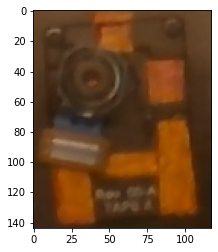

In [ ]:
plt.imshow(testX[2])
print(testy[2])

In [ ]:
num = 0
for i in range(len(testX)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
  if result[i] != testy[i]:
    print(i)
    num +=1

print("===========")
print(num)

0


1
[1.]


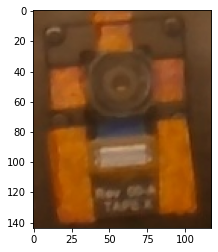

In [ ]:
plt.imshow(testX[62])
print(testy[62])
print(result[62])

1
[1.]


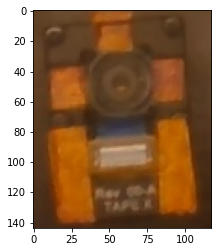

In [ ]:
plt.imshow(testX[5])
print(testy[5])
print(result[5])

0
[0.]


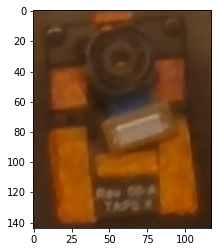

In [ ]:
plt.imshow(testX[6])
print(testy[6])
print(result[6])

In [ ]:
def draw_sample_label(X,y,ypred=None):
    X = X[:12]
    y = y[:12]
    plt.subplots(3,4)
    for i in range(len(X)):
        plt.subplot(3,4,i+1)
        plt.imshow(X[i])
        if ypred is None:
            plt.title(f'y={y[i]}')
        else:
            plt.title(f'y={y[i]} ypred={ypred[i]}')
    plt.show()

In [ ]:
# def draw_sample_label(testX,testy,ypred=None):
#     testX = testX[:9]
#     testy = testy[:9]
#     plt.subplots(3,3)
#     for i in range(len(testX)):
#         plt.subplot(3,3,i+1)
#         plt.imshow(X[i])
#         plt.title(f'y={y[i]} ypred={ypred[i]}')
#     plt.show()

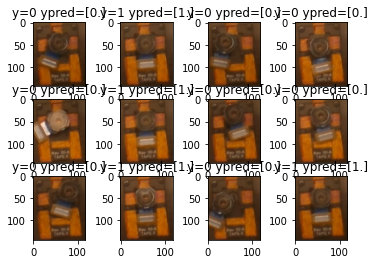

In [ ]:
draw_sample_label(testX, testy, result)